# Skin Lesion Classification


# Step 1: Load the HAM10000 (Human Against Machine with 10000 training images) dataset

In [ ]:
# Mount Google Drive (from tutorial: https://colab.research.google.com/notebooks/io.ipynb)

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Install Kaggle python library

!pip install kaggle

In [ ]:
# Upload Kaggle API Key (code from tutorial: https://www.kaggle.com/code/kalaikumarr/google-colab-kaggle-api)

from google.colab import files
files.upload()

In [ ]:
# Move API Key (code from tutorial: https://www.kaggle.com/code/kalaikumarr/google-colab-kaggle-api)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download Skin Cancer MNIST: HAM10000 dataset to Google Drive (code from tutorial: https://www.kaggle.com/code/kalaikumarr/google-colab-kaggle-api) and dataset here: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p /content/drive/MyDrive/Datasets/SkinCancerMNIST

100% 5.19G/5.20G [01:19<00:00, 81.7MB/s]
100% 5.20G/5.20G [01:19<00:00, 70.5MB/s]


In [ ]:
# Extract the Skin Cancer MNIST: HAM10000 dataset zip file (code from tutorial: https://www.geeksforgeeks.org/unzipping-files-in-python/)

import zipfile

# Path to the downloaded zip file of HAM10000 dataset
downloaded_path = "/content/drive/MyDrive/Datasets/SkinCancerMNIST/skin-cancer-mnist-ham10000.zip"

# Path to extract the skin lesion images in HAM10000 dataset
extracted_path = "/content/drive/MyDrive/Datasets/SkinCancerMNIST/images"

# Extract the zip file of HAM10000 dataset
with zipfile.ZipFile(downloaded_path, 'r') as zipped_files:
    zipped_files.extractall(extracted_path)


# Run on Google Colab TPU

In [ ]:
# code from tutorial: https://colab.research.google.com/notebooks/tpu.ipynb#scrollTo=FpvUOuC3j27n

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.12.0
Running on TPU  ['10.104.240.10:8470']


In [ ]:
# Match the image data with the skin lesion type in CSV file (code from tutorial: https://www.kaggle.com/code/xinruizhuang/skin-lesion-classification-acc-90-pytorch)

from glob import glob
import pandas as pd
import os

data_dir = '/content/drive/MyDrive/Datasets/SkinCancerMNIST/images'
all_image_path = glob(os.path.join(data_dir, '*', '*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}
lesion_type_dict = {
    'nv': 'melanocytic nevi',
    'mel': 'melanoma',
    'bkl': 'benign keratosis',
    'bcc': 'basal cell carcinoma',
    'akiec': 'actinic keratoses',
    'vasc': 'vascular lesions',
    'df': 'dermatofibroma'
}

# Assign lesion type to metadata csv

df_original = pd.read_csv(os.path.join(data_dir, 'HAM10000_metadata.csv'))
df_original['path'] = df_original['image_id'].map(imageid_path_dict.get)
df_original['cell_type'] = df_original['dx'].map(lesion_type_dict.get)
df_original['cell_type_idx'] = pd.Categorical(df_original['cell_type']).codes
df_original.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,benign keratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,benign keratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,benign keratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,benign keratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,benign keratosis,2


# Step 2: Exploratory Data Analysis

## Show the counts by diagnosis of skin lesion

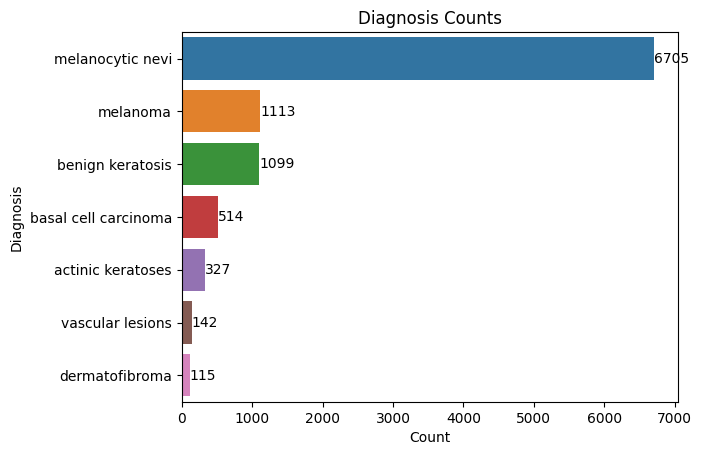

In [ ]:
# code from tutorial: https://www.statology.org/seaborn-horizontal-barplot/

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_diagnosis_counts = df_original['dx'].map(lesion_type_dict).value_counts()

# Create a bar chart using Seaborn
ax = sns.barplot(x=dataset_diagnosis_counts.values, y=dataset_diagnosis_counts.index)

# Show the bar chart title and axis labels
plt.title('Diagnosis Counts')
plt.xlabel('Count')
plt.ylabel('Diagnosis')

ax.bar_label(ax.containers[0])

# Display the bar chart
plt.show()


## Show the counts by location of skin lesion

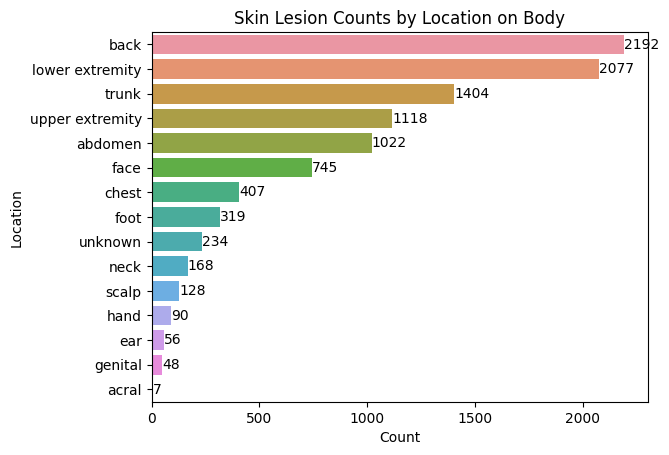

In [ ]:
# code from tutorial: https://www.statology.org/seaborn-horizontal-barplot/

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_skin_lesion_counts = df_original['localization'].value_counts()

# Create a horizontal bar chart using Seaborn
ax = sns.barplot(x=dataset_skin_lesion_counts.values, y=dataset_skin_lesion_counts.index)

# Show the bar chart title and axis labels
plt.title('Skin Lesion Counts by Location on Body')
plt.xlabel('Count')
plt.ylabel('Location')

ax.bar_label(ax.containers[0])

# Display the bar chart
plt.show()


# Step 3: Show Plots, Assign Classes to the Data, and Train the Model

In [ ]:
# Import Libraries and read metadata csv to assign classes to diagnosis codes (code from tutorial: https://github.com/bnsreenu/python_for_microscopists/blob/master/203b_skin_cancer_lesion_classification_V4.0.py) and (https://www.youtube.com/watch?v=fyZ9Rxpoz2I)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from keras.utils.np_utils import to_categorical # for one-hot encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

skin_lesion_df = pd.read_csv('/content/drive/MyDrive/Datasets/SkinCancerMNIST/images/HAM10000_metadata.csv')

# Set the image dimension size

SIZE=224

# Label encode the diagnosis type
label_encoder = LabelEncoder()
label_encoder.fit(skin_lesion_df['dx'])
print(list(label_encoder.classes_))

skin_lesion_df['label'] = label_encoder.transform(skin_lesion_df["dx"])
print(skin_lesion_df.sample(10))


['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

# Balance the Skin Diagnosis Types due to majority of records in melanocytic nevi

In [ ]:
# Code from tutorial: https://github.com/bnsreenu/python_for_microscopists/blob/master/203b_skin_cancer_lesion_classification_V4.0.py) and (https://www.youtube.com/watch?v=fyZ9Rxpoz2I)

from sklearn.utils import resample

# Balance the skin lesion diagnosis types

df_0 = skin_lesion_df[skin_lesion_df['label'] == 0]
df_1 = skin_lesion_df[skin_lesion_df['label'] == 1]
df_2 = skin_lesion_df[skin_lesion_df['label'] == 2]
df_3 = skin_lesion_df[skin_lesion_df['label'] == 3]
df_4 = skin_lesion_df[skin_lesion_df['label'] == 4]
df_5 = skin_lesion_df[skin_lesion_df['label'] == 5]
df_6 = skin_lesion_df[skin_lesion_df['label'] == 6]

# Set number of samples for each skin lesion diagnosis type

n_samples = 700

df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

# Combine the skin lesion diagnosis type dataframes and observe the distribution of each skin lesion diangosis type

skin_lesion_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

# Display the distribution of skin lesion diagnosis counts

print(skin_lesion_df_balanced['label'].value_counts())



0    700
1    700
2    700
3    700
4    700
5    700
6    700
Name: label, dtype: int64


# Read and preprocess the images for model training



In [ ]:
# Code from tutorial: https://github.com/bnsreenu/python_for_microscopists/blob/master/203b_skin_cancer_lesion_classification_V4.0.py) and (https://www.youtube.com/watch?v=fyZ9Rxpoz2I)

data_dir = '/content/drive/MyDrive/Datasets/SkinCancerMNIST/images'
all_image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(data_dir, '*', '*.jpg'))}

# Add path as a new column in the dataframe
skin_lesion_df_balanced['path'] = skin_lesion_df['image_id'].map(all_image_path.get)
# Read the images from the path
skin_lesion_df_balanced['image'] = skin_lesion_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [ ]:
# Show first 5 records of skin_lesion_df_balanced to show new image column
skin_lesion_df_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,"[[[149, 106, 88], [148, 108, 94], [153, 117, 1..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,"[[[135, 75, 83], [137, 77, 84], [141, 81, 86],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,"[[[69, 36, 38], [79, 46, 50], [91, 59, 61], [1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,"[[[166, 115, 152], [181, 128, 163], [184, 128,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,/content/drive/MyDrive/Datasets/SkinCancerMNIS...,"[[[195, 171, 195], [194, 171, 193], [198, 176,..."


In [ ]:
# Write balanced class dataframe to CSV
skin_lesion_df_balanced.to_csv('/content/drive/MyDrive/Datasets/SkinCancerMNIST/skin_lesion_df_balanced_version_2_.csv', index=False)

# Show sample of resized images

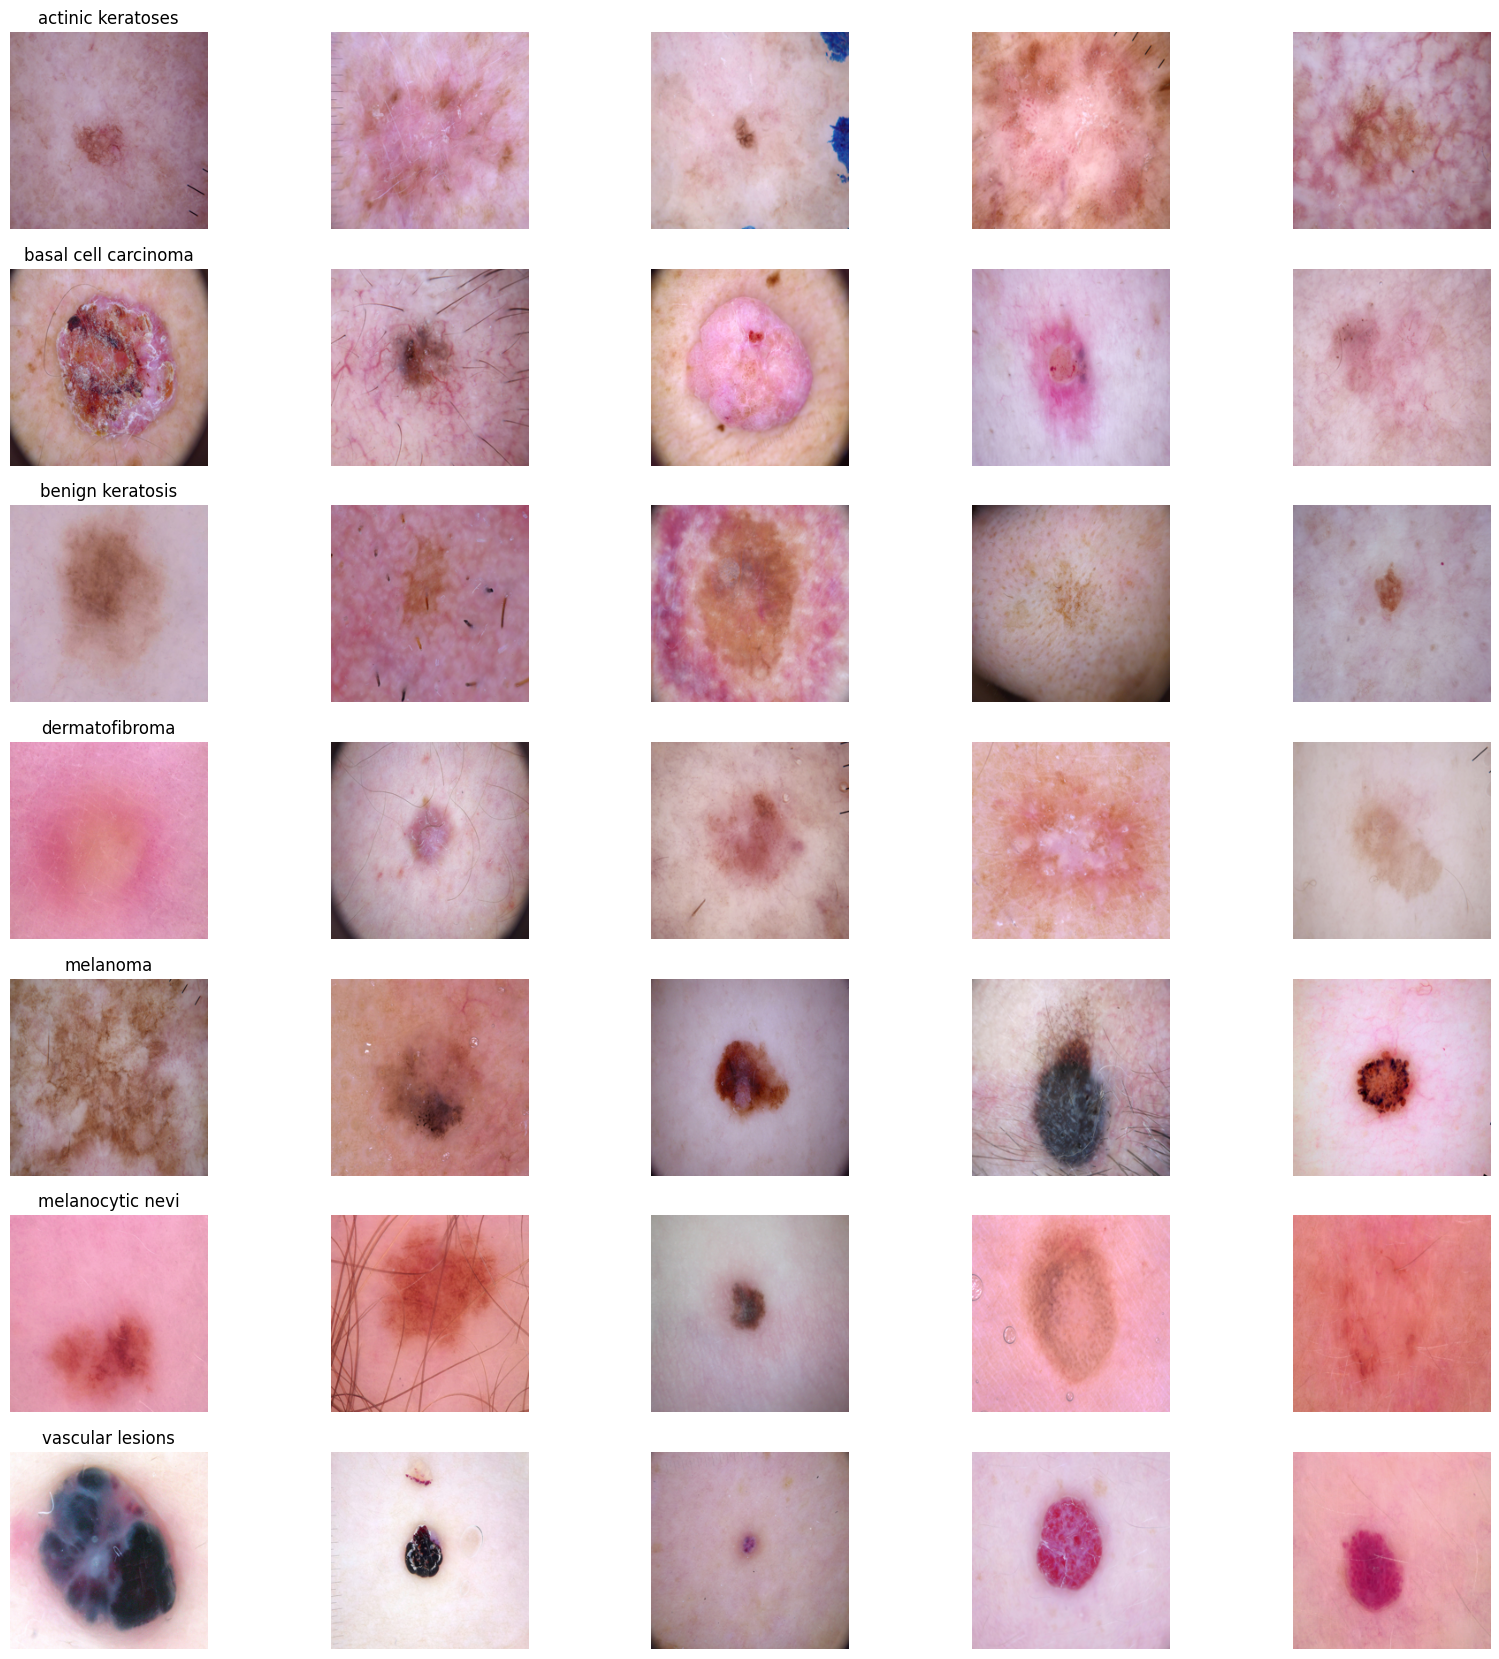

In [ ]:
# Code from tutorial: https://github.com/bnsreenu/python_for_microscopists/blob/master/203b_skin_cancer_lesion_classification_V4.0.py) and (https://www.youtube.com/watch?v=fyZ9Rxpoz2I)
# and from tutorial: https://www.kaggle.com/code/smitisinghal/skin-disease-classification

# Set number of samples for each skin lesion diagnosis type
n_samples = 5


# Create a dictionary of the diagnosis codes and skin lesion types to show the skin lesion type on the figures
diagnosis_dict = {
    'bkl': 'benign keratosis',
    'mel': 'melanoma',
    'nv': 'melanocytic nevi',
    'vasc': 'vascular lesions',
    'akiec': 'actinic keratoses',
    'bcc': 'basal cell carcinoma',
    'df': 'dermatofibroma'
}

# Set the number of samples to show and image dimensions
fig, m_axs = plt.subplots(7, n_samples, figsize=(4*n_samples, 3*7))


for n_axs, (type_name, type_rows) in zip(m_axs, skin_lesion_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(diagnosis_dict[type_name])  # Use the long form of the skin diagnosis type from the dictionary
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')


# Convert dataframe of images into a numpy array and split the data to train and test 20% of the data



In [ ]:
# Code from tutorial: https://github.com/bnsreenu/python_for_microscopists/blob/master/203b_skin_cancer_lesion_classification_V4.0.py) and (https://www.youtube.com/watch?v=fyZ9Rxpoz2I)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Convert image attribute to numpy array
X = np.asarray(skin_lesion_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1

# Assign the labels to Y
Y = skin_lesion_df_balanced['label']

# Convert to categorical for multiclass classification
Y_cat = to_categorical(Y, num_classes=7)

# Split into training and testing datasets (test 20% of the data)
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.20, random_state=42)


# Define and train the model

In [ ]:
# Stop training if model reaches 87% validation accuracy (code from StackOverflow: https://stackoverflow.com/questions/59563085/how-to-stop-training-when-it-hits-a-specific-validation-accuracy)
import tensorflow as tf


class ValidationThreshold(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ValidationThreshold, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_acc"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

validation_threshold = ValidationThreshold(threshold=0.87)

9406464/9406464 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               25

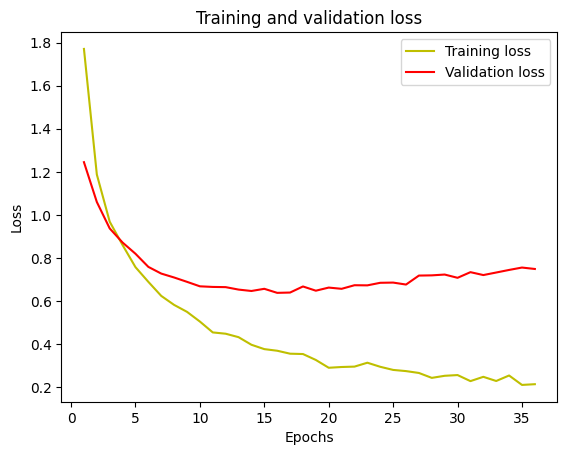

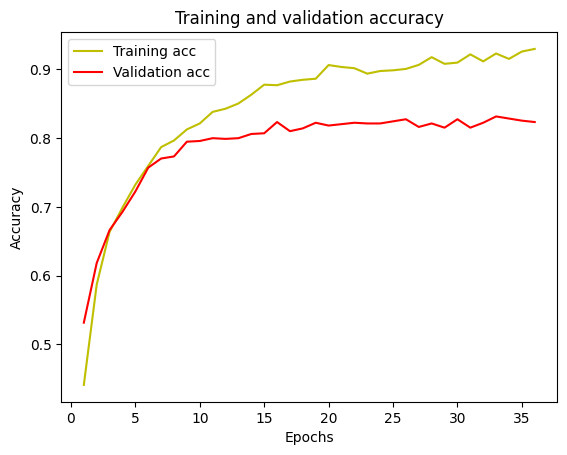

31/31 [==============================] - 15s 470ms/step


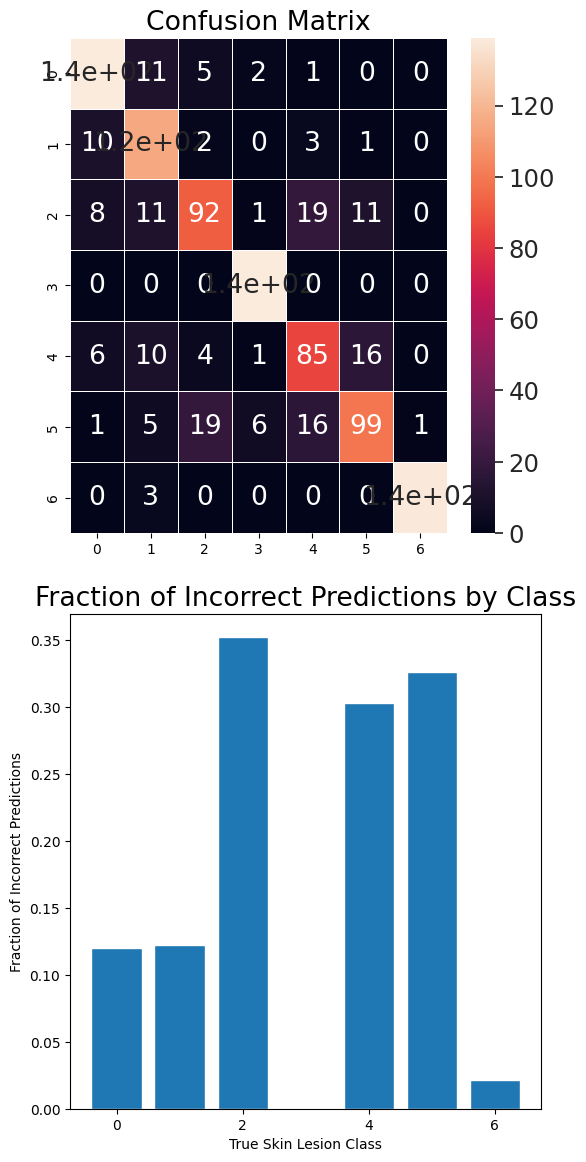

In [ ]:
# Code from tutorial: https://github.com/bnsreenu/python_for_microscopists/blob/master/203b_skin_cancer_lesion_classification_V4.0.py) and (https://www.youtube.com/watch?v=fyZ9Rxpoz2I)

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.layers import BatchNormalization

# Load the MobileNetV2 model with pre-trained weights
mobilenet_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

for layer in mobilenet_model.layers:
    layer.trainable = False

num_classes = 7

model = Sequential()
model.add(mobilenet_model)

model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)


batch_size = 64
epochs = 50

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    callbacks=[early_stopping, validation_threshold],
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])
# Save the model
model.save('/content/drive/MyDrive/Datasets/SkinCancerMNIST/model_version_2.h5')



# Plot the training and validation accuracy after training each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Predict on test data
y_pred = model.predict(x_test)
# Convert the predictions to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert the test data to one hot vecotrs
y_true = np.argmax(y_test, axis = 1)

# Define the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 12))

# Label the confusion matrix
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax1)
ax1.set_title('Confusion Matrix')

# Plot the fractional incorrect misclassifications bar chart
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
ax2.bar(np.arange(7), incorr_fraction)
ax2.set_xlabel('True Skin Lesion Class')
ax2.set_ylabel('Fraction of Incorrect Predictions')
ax2.set_title('Fraction of Incorrect Predictions by Class')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Step 4: Create Streamlit Webpage to Upload Skin Lesion and Retrieve Prediction

In [ ]:
# Install Streamlit

!pip install streamlit

# Create Python file to predict the user uploaded skin lesion image in Streamlit based on the model

Treatments and condition descriptions from:

*  https://www.mayoclinic.org/diseases-conditions
*  https://www.skincancer.org/
*  https://dermnetnz.org/
*  https://www.mayoralderm.com/vascular-lesions/






In [ ]:
# Code from Machine Learning Apps with Streamlit YouTube Tutorial: https://youtu.be/_Syn5SpWgZ0 and Streamlit documentation: https://docs.streamlit.io/library/api-reference/widgets/st.text_input
# and code from: Streamlit documentation https://docs.streamlit.io/library/api-reference/charts/st.altair_chart and https://docs.streamlit.io/library/api-reference/media/st.image and from code from tutorial: https://towardsdatascience.com/streamlit-from-scratch-presenting-data-d5b0c77f9622
%%writefile skin_lesion_classifier.py

# Import libraries
import streamlit as st
import numpy as np
import tensorflow as tf
from keras.models import load_model
from PIL import Image
import io
import pandas as pd
import altair as alt

# Put title and description of Streamlit App
st.title('Skin Lesion Image Classifier')
st.write('Predict the classification of the skin lesion diagnosis type based on user uploaded image')

# User uploads image of skin lesion
skin_lesion_image = st.file_uploader('Please upload skin lesion image', type=['jpg'])

# Predict the skin lesion diagnosis type based on the uploaded image and visualize the results
if skin_lesion_image:

    # Convert the uploaded skin lesion image to a PIL Image for processing
    pil_image = Image.open(skin_lesion_image)

    # Create dictionary of diagnosis labels and skin lesion types
    diagnosis_mapping = {
        0: 'actinic keratoses',
        1: 'basal cell carcinoma',
        2: 'benign keratosis',
        3: 'dermatofibroma',
        4: 'melanoma',
        5: 'melanocytic nevi',
        6: 'vascular lesions'
    }

    # Resize the skin lesion image to (224, 224) to match the input shape of the model
    resized_skin_lesion_image = pil_image.resize((224, 224))
    st.image(resized_skin_lesion_image, caption='Resized Skin Lesion Image', use_column_width=True)

    # Convert resized skin lesion image to a NumPy array
    skin_lesion_image_array = np.array(resized_skin_lesion_image)

    # Reshape the skin lesion image array
    skin_lesion_image_array = skin_lesion_image_array.reshape(1, 224, 224, 3)

    # Load the model weights
    model = load_model('/content/drive/MyDrive/Datasets/SkinCancerMNIST/model_version_2.h5')

    # Predict the skin lesion diagnosis
    prediction = model.predict(skin_lesion_image_array)

    # Retrieve the skin lesion diagnosis with the highest probability
    diagnosis_label = np.argmax(prediction)
    diagnosis_type = diagnosis_mapping.get(diagnosis_label)

    # Retrieve confidence score of the predicted skin lesion diagnosis
    confidence_score = prediction[0][diagnosis_label]

    # Retrieve confidence percentages of all skin lesion diagnoses for uploaded image
    confidence_percentages = prediction[0]

    # Sum up confidence score percentages to 1
    confidence_percentages /= np.sum(confidence_percentages)

    # Create a Pandas DataFrame with skin lesion diagnosis names and confidence score percentages for the uploaded skin lesion image
    skin_lesion_df_visualization = pd.DataFrame({"Skin Lesion Diagnosis Type": list(diagnosis_mapping.values()), "Confidence Score %": confidence_percentages})

    # Create bar chart of showing skin lesion diagnosis names and confidence score percentages of the uploaded skin lesion image using Altair
    c = alt.Chart(skin_lesion_df_visualization).mark_bar().encode(
    x='Skin Lesion Diagnosis Type', y='Confidence Score %')

    st.altair_chart(c, use_container_width=True)

    # Show the dataframe of predicted skin lesion diagnosis type and confidence score
    st.dataframe(skin_lesion_df_visualization, use_container_width=True)

    # Show the prediction results of the skin lesion diagnosis type
    st.write('The uploaded skin lesion image is predicted as: {} with a confidence score of: {:.2%}'.format(diagnosis_type, confidence_score))

# Prompt the user to enter the skin lesion that was predicted to output information regarding the predicted skin lesion diagnosis type
skin_lesion_prompt = st.text_input("Please enter the name of the skin lesion diagnosis type for more information")

# Provide information based on the predicted skin lesion diagnosis type
skin_lesion_info = None

if skin_lesion_prompt:
    if skin_lesion_prompt == "basal cell carcinoma":
        skin_lesion_info = "Basal cell carcinoma is the most common type of skin cancer, but it can be treated effectively when discovered early. It is caused by damage to the basal cells, which are found on the outermost layer of the skin. Treatment options for BCC include surgical exision of the lesion as well as a margin of skin around the lesion (this is the most common treatment option). Other treatment options include: Mohs surgery, radiation therapy, cryotherapy, and other treatment options.  The dermatologist will discuss and review all treatment options with you. After treatment, the dermatologist will need to monitor you for any skin lesion changes during your annual skin exam. Please use sunscreen SPF 30 or above and avoid tanning beds and heavy exposure to sunlight."
    elif skin_lesion_prompt == "actinic keratoses":
        skin_lesion_info = "Actinic keratoses are the most common form of precancer skin lesions. They are caused by long-term exposure to ultraviolet (UV) rays and appear as small, dry, scaly patches on the skin. There is a 5-10% chance that AKK lesions can turn into a form of skin cancer called squamous cell carcinoma, but the majority of these types of lesions will not develop into skin cancer. Treatment options include cryotherapy which involves: freezing the lesion with liquid nitrogen and removing the lesion; scraping the damaged cells off by device called curet; destroying the lesion through laser therapy with an ablative laser device and allowing new skin cells to develop; photodynamic therapy which involves applying a light-sensitive solution to the skin lesion and exposing the lesion to a special light that destroys the lesion. The dermatologist will discuss and review all treatment options with you. After treatment, the dermatologist will need to monitor you for any skin lesion changes during your annual skin exam. Please use sunscreen SPF 30 or above and avoid tanning beds and heavy exposure to sunlight."
    elif skin_lesion_prompt == "benign keratosis":
        skin_lesion_info = "Benign keratosis is a non-cancerous skin growth, and they tend to develop more as people get older. These types of lesions do not require treatment, but the dermatologist can discuss removing these lesions with you if you desire to have them removed for cosmetic reasons."
    elif skin_lesion_prompt == "dermatofibroma":
        skin_lesion_info = "Dermatofibromas are benign (non-cancerous) lesions that typically range from 7-10 mm in diameter, and range in color from pink to light brown to dark brown to black. These types of lesions do not typically cause symptoms, but they can sometimes be painful, tender, or itchy. If there is any atypical features found on the lesion such as asymmetry, the dermatologist may opt to biospy the lesion and send for further testing to diagnose the lesion. The dermatologist will discuss this option with you after performing a skin exam."
    elif skin_lesion_prompt == "melanoma":
        skin_lesion_info = "Melanoma is a serious type of skin cancer, but it can be treated effectively when discovered early. It is caused by the uncontrolled growth of melanocytes, which are the pigment producing cells in the skin. Melanoma can be in situ (tumour is confined to the epidermis which is the outermost layer of the skin); invasive (the tumour has spread to the dermis, which is the layer immediately below the dermis); and metastatic which means the tumour has spread to other tissues in the body. 90% of melanomas can be cured through surgery when discovered early. More advanced melanomas may require combination of treatment options such as surgery, drug therapy, and radiation therapy. The dermatologist will discuss all treatment options and keep you informed each step of the way."
    elif skin_lesion_prompt == "melanocytic nevi":
        skin_lesion_info = "Melanocytic nevi are also referred to as moles. These types of lesions are typically benign and do not require treatment. The dermatologist will monitor any changes to your moles by examining their ABCD characteristics (Asymmetry, Border irregularity, Color variation, and Diameter greater than 6 mm). If there are changes in your moles, the dermatologist may opt to biopsy the mole and send to a pathologist for further testing. The dermatologist will discuss if this option is necessary, and it is important that you maintain your annual skin exams so the dermatologist can monitor any changes with your moles."
    elif skin_lesion_prompt == "vascular lesions":
        skin_lesion_info = "Vascular lesions are due to ruptures underneath the blood vessels and can be reddish or purplish. These types of lesions can be congenital (birthmarks) or acquired later in life. Treatment options include Intense Pulsed Light Therapy which applies a series of light beams over the lesions that penetrate the skin layers and allow absorption which will reduce or eliminate the lesion. The dermatologist will discuss all treatment options with you regarding this type of lesion."

# Display the skin lesion information
if skin_lesion_info:
    st.write("Here is more information on: ", skin_lesion_prompt)
    st.markdown(skin_lesion_info)


Overwriting skin_lesion_classifier.py


# Install LocalTunnel and Run Skin Lesion Classifier on Streamlit

In [ ]:
# from Streamlit forums: https://discuss.streamlit.io/t/how-to-launch-streamlit-app-from-google-colab-notebook/42399

!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.728s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
# from Streamlit forums: https://discuss.streamlit.io/t/how-to-launch-streamlit-app-from-google-colab-notebook/42399

!streamlit run skin_lesion_classifier.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.32.231.170
npx: installed 22 in 1.493s
your url is: https://polite-bees-push.loca.lt
